# BANK PERSONAL LOAN PREDICTION

## Importing Libraries

In [ ]:
!pip install zipcodes

In [ ]:
import numpy as np
import pandas as pd
import zipcodes as zcode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

sns.set_theme()

In [ ]:
data = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv') #loading in your dataset

**EXPLORE DATA**

In [ ]:
data.head() # top 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail() # last 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape #checking for rows and columns
print('The total number of rows are: ', data.shape[0])
print('The total number of columns are: ', data.shape[1])

The total number of rows are:  5000
The total number of columns are:  14


Check for null values

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.nunique() # counting the unique values in each column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Personal Loan is the Target variable from the data.
We don't need the ID columnn so we have to drop it

In [ ]:
data.drop(columns = 'ID', axis = 1, inplace = True)

In [ ]:
data.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


# **Data Preprocessing**

### Upon research zip codes can go a very long way to affect the target variable. Covert the zipcodes to counties and later to regions.

In [ ]:
data['ZIP Code'].nunique()

467

In [ ]:
unique_zipcode = data['ZIP Code'].unique() #storing the unique zip codes into a list to do the matching

In [ ]:
unique_zipcode #viewing the unique zipcodes

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [ ]:
county_dict = {} # Creating an empty dictionary to store the matching keys and its values

for zipcode in unique_zipcode: # The for loop is used to iterate over the keys and matching it till its contents are exhausted
  us_county = zcode.matching(zipcode.astype('str')) # Converts the zipcode to the type string upon matching
  if len(us_county) == 1:
    county = us_county[0].get('county')

  else:
    county = zipcode

  county_dict.update({zipcode: county}) # Updates the found matching values to the initial empty dictionary

In [ ]:
county_dict # This is the new dictionary after update

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

### Four of them still have the zipcodes so I will manually copy it from online

In [ ]:
county_dict.update({92717: 'Orange County'})
county_dict.update({92634: 'Orange County'})
county_dict.update({96651: 'El Dorado County'})
county_dict.update({9307: 'Ventura County'})

In [ ]:
county_dict

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [ ]:
data['County'] = data['ZIP Code'].map(county_dict) # Creating a new column 'County' and mapping the new values to county.

In [ ]:
data.head() #preview of the new column created

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [ ]:
data['County'].nunique() # Now the unique counties are 38

38

### Descriptive statistics about the data

In [ ]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Experience has -3 which is an outlier and can be a mistake so let's visualize and see

<Axes: ylabel='Experience'>

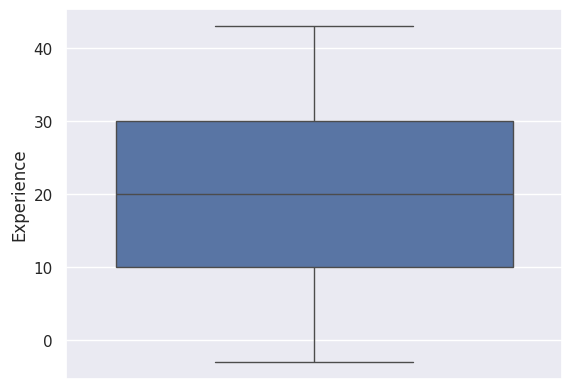

In [ ]:
sns.boxplot(y = 'Experience', data = data)

In [ ]:
data.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County


In [ ]:
len(data[data['Experience'] < 0].sort_values('Experience')) # Checking the number of rows that has less than 0 experience

52

In [ ]:
data[data['Experience'] < 0]['Age'].describe() # Descriptive statistics about the column and people that had below 0 experience

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

### From the data Age 23-29 had less than 0 which are negatives. It can be that the - sign appeared as a mistake because under normal circumstances 23-29 have experiences. If that is the case we have to make it an absolute value

In [ ]:
# We are replacing the negatives with its absolutes which means the sign will be gone
data.loc[data['Experience'] < 0, 'Experience'] = np.abs(data['Experience'])

In [ ]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: ylabel='Experience'>

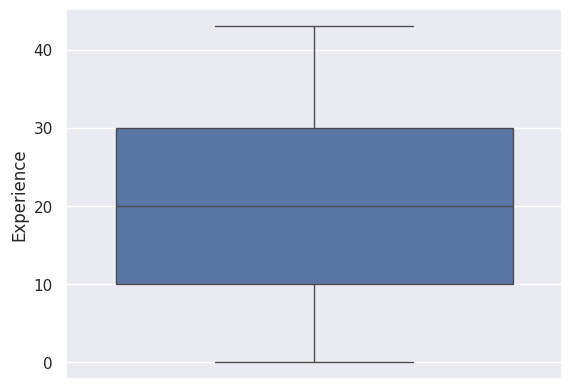

In [ ]:
sns.boxplot(y = data['Experience'], data =data) #Plotting it to see if the negatives are gone

# EXPLORATORY DATA ANALYSIS

In [ ]:
data.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County


In [ ]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'County'],
      dtype='object')

In [ ]:
# Creating a list of all our columns and using for loop to iterate over each of them and their respetive value counts
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'County']

for column in cols:
  print(data[column].value_counts().sort_values(ascending = False))
  print('-' * 30)

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64
------------------------------
Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
15    119
8     119
6     119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: count, dtype: int64
------------

### USE THE FUNCTION OR THE FOR LOOP TO CREATE THE PLOTS FOR EDA

In [ ]:
# A function for creating plots for EDA. All you need to do is provide the column
def plots(column):
  sns.countplot(x = column, data = data, hue = 'Personal Loan')

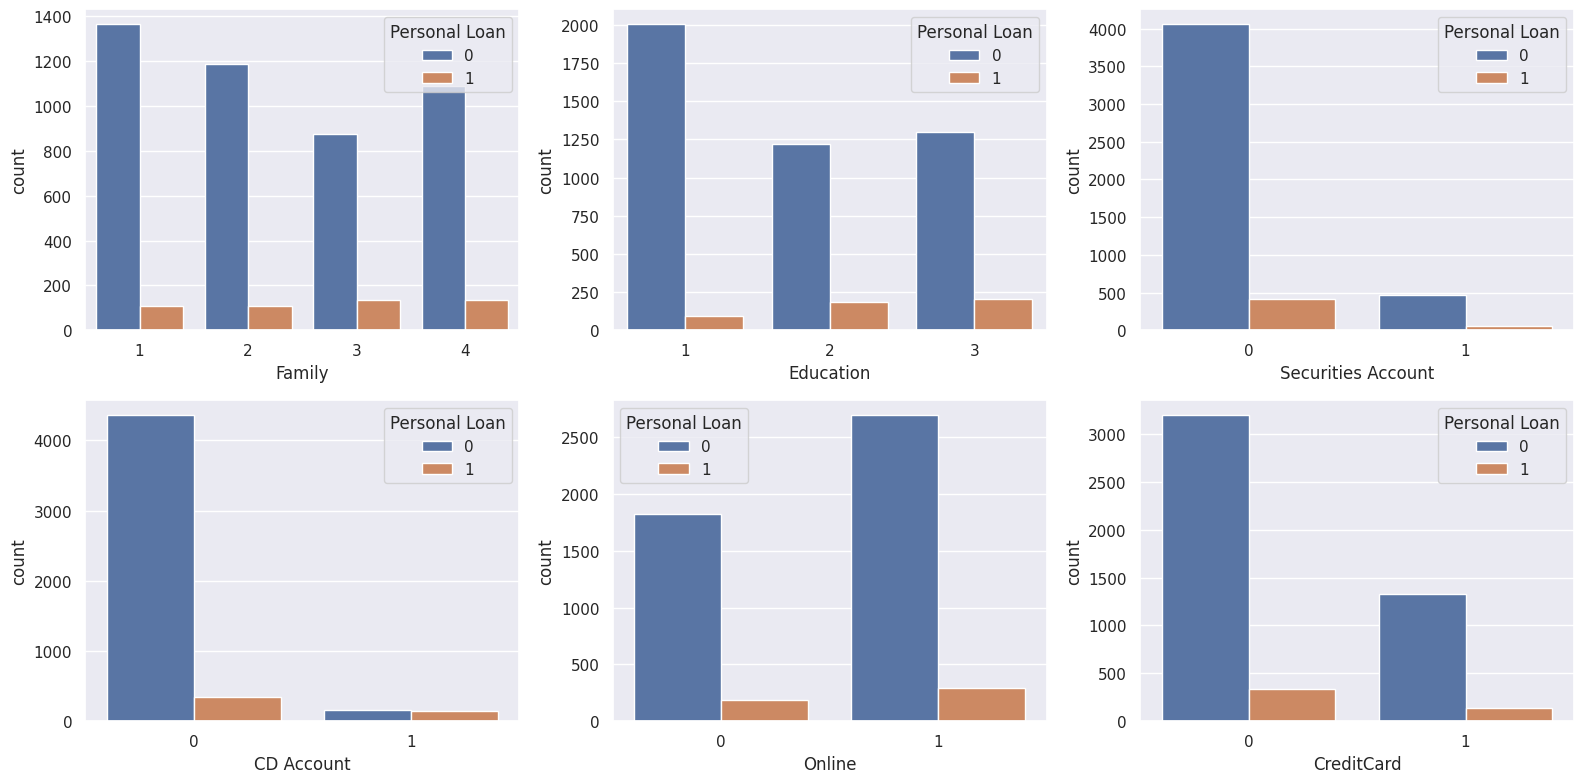

In [ ]:
# Create a list of columns that can be put into categories for the EDA
cols1 = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each countplot in a separate subplot
for i, col in enumerate(cols1):
    sns.countplot(x=col, data=data, hue='Personal Loan', ax=axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# For easy plotting and analysis lets divide the age into categories and find the counts
data['Agebin'] = pd.cut(data['Age'], bins = [10, 40, 60, 80], labels = ['20-40', '41-60', '61-80'])

In [ ]:
data.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County,Agebin
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,20-40
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,41-60


In [ ]:
data['Agebin'].value_counts()

Agebin
41-60    2593
20-40    1860
61-80     547
Name: count, dtype: int64

## Converting the counties into regions to make it easy

In [ ]:
data['County'].unique()

array(['Los Angeles County', 'Alameda County', 'San Francisco County',
       'San Diego County', 'Monterey County', 'Ventura County',
       'Santa Barbara County', 'Marin County', 'Santa Clara County',
       'Santa Cruz County', 'San Mateo County', 'Humboldt County',
       'Contra Costa County', 'Orange County', 'Sacramento County',
       'Yolo County', 'Placer County', 'San Bernardino County',
       'San Luis Obispo County', 'Riverside County', 'Kern County',
       'Fresno County', 'Sonoma County', 'El Dorado County',
       'San Benito County', 'Butte County', 'Solano County',
       'Mendocino County', 'San Joaquin County', 'Imperial County',
       'Siskiyou County', 'Merced County', 'Trinity County',
       'Stanislaus County', 'Shasta County', 'Tuolumne County',
       'Napa County', 'Lake County'], dtype=object)

In [ ]:
# Mapping the 39 counties to their respective regions
county_to_region = {
    'Los Angeles County': 'Southern California Region',
    'Alameda County': 'San Francisco Bay Area Region',
    'San Francisco County': 'San Francisco Bay Area Region',
    'San Diego County': 'Southern California Region',
    'Monterey County': 'Central Coast Region',
    'Ventura County': 'Southern California Region',
    'Santa Barbara County': 'Central Coast Region',
    'Marin County': 'San Francisco Bay Area Region',
    'Santa Clara County': 'San Francisco Bay Area Region',
    'Santa Cruz County': 'Central Coast Region',
    'San Mateo County': 'San Francisco Bay Area Region',
    'Humboldt County': 'Northern California Region',
    'Contra Costa County': 'San Francisco Bay Area Region',
    'Orange County': 'Southern California Region',
    'Sacramento County': 'Central Valley Region',
    'Yolo County': 'Northern California Region',
    'Placer County': 'Northern California Region',
    'San Bernardino County': 'Southern California Region',
    'San Luis Obispo County': 'Central Coast Region',
    'Riverside County': 'Southern California Region',
    'Kern County': 'Central Valley Region',
    'Fresno County': 'Central Valley Region',
    'Sonoma County': 'San Francisco Bay Area Region',
    'El Dorado County': 'Northern California Region',
    'San Benito County': 'Northern California Region',
    'Butte County': 'Northern California Region',
    'Solano County': 'San Francisco Bay Area Region',
    'Mendocino County': 'Northern California Region',
    'San Joaquin County': 'Central Valley Region',
    'Imperial County': 'Southern California Region',
    'Siskiyou County': 'Northern California Region',
    'Merced County': 'Central Valley Region',
    'Trinity County': 'Northern California Region',
    'Stanislaus County': 'Central Valley Region',
    'Shasta County': 'Northern California Region',
    'Tuolumne County': 'Northern California Region',
    'Napa County': 'San Francisco Bay Area Region',
    'Lake County': 'Northern California Region',
    'Mono County': 'Eastern Sierra Region',
    'Inyo County': 'Eastern Sierra Region'
}


In [ ]:
# Create a new column called Regions and map the values in there to have regions
data['Regions'] = data['County'].map(county_to_region)

In [ ]:
# Counting the Unique number of regions
data['Regions'].value_counts()

Regions
Southern California Region       2304
San Francisco Bay Area Region    1727
Central Coast Region              383
Central Valley Region             296
Northern California Region        290
Name: count, dtype: int64

<Axes: xlabel='Regions', ylabel='count'>

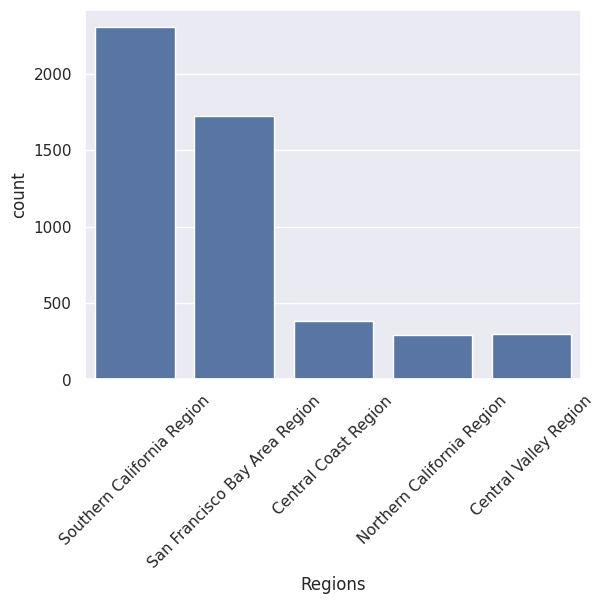

In [ ]:
# Ploting them to see their distribution
plt.xticks(rotation = 45)
sns.countplot(x = 'Regions', data = data)

## EXPLORE CORRELATION BETWEEN SOME SELECTED IMPORTANT COLUMNS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   int64   
 9   Securities Account  5000 non-null   int64   
 10  CD Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  County              5000 non-null   object  
 14  Agebin              5000 non-null   category
 15  Regions             5000 non-null   ob

In [ ]:
num_cor = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

<Axes: >

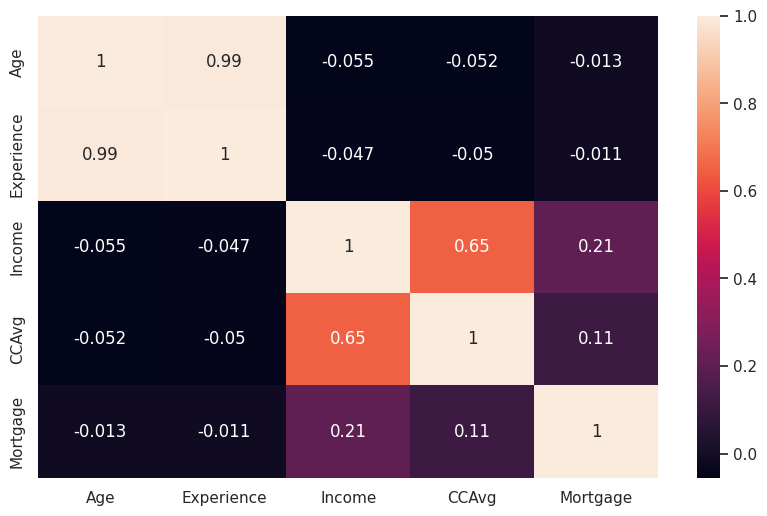

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(num_cor.corr(), annot = True)

From the Heatmap above, there is a positve correlation between age and experience. Income and CCAvge also has a convincing positive corelation. Mortgage and Income to has a little postive correlation. Since Age and experience and age are higly correlated we can drop one and we won't have a problem.

## CONVERT CATEGORICAL COLUMNS TO NUMERICAL COLUMNS

In [ ]:
data.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County,Agebin,Regions
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,20-40,Southern California Region
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,41-60,Southern California Region


### Drop unncessary columns that are not needed for creating the model

In [ ]:
data.drop(columns = ['Agebin', 'County', 'ZIP Code', 'Experience'], inplace = True)

In [ ]:
data.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Regions
0,25,49,4,1.6,1,0,0,1,0,0,0,Southern California Region
1,45,34,3,1.5,1,0,0,1,0,0,0,Southern California Region


In [ ]:
data['Regions'].unique()

array(['Southern California Region', 'San Francisco Bay Area Region',
       'Central Coast Region', 'Northern California Region',
       'Central Valley Region'], dtype=object)

## Encoding the Regions

Southern California Region: 1

San Francisco Bay Area Region: 2

Central Coast Region: 3

Northern California Region: 4

Central Valley Region: 5

In [ ]:
data['Regions'].replace({'Southern California Region': 1,
    'San Francisco Bay Area Region': 2,
    'Central Coast Region': 3,
    'Northern California Region': 4,
    'Central Valley Region': 5}, inplace = True)

In [ ]:
data.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Regions
0,25,49,4,1.6,1,0,0,1,0,0,0,1
1,45,34,3,1.5,1,0,0,1,0,0,0,1


## Checking whether the data is imbalanced or Not.

### If it is we will decide to use Under-sampling or Over-sampling

In [ ]:
data['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

## As you can see the data is Highly imbalanced as 0 is 4520 and 1 is 480.

### We will employ Under sampling

In [ ]:
# Divide the data to loan(1) and no_loan(0) so that you can under sample the one that was many
loan = data[data['Personal Loan'] == 1]
no_loan = data[data['Personal Loan'] == 0]

In [ ]:
print(loan.shape)
print(no_loan.shape)

(480, 12)
(4520, 12)


In [ ]:
# Put the sampled data in a new variable and choose sample size
no_loan_sample = no_loan.sample(n=500)

In [ ]:
# Now we have two separate dataset above so lets concatenate it on row bases
new_dataset = pd.concat([no_loan_sample, loan], axis = 0)

In [ ]:
new_dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Regions
2191,42,171,2,8.0,1,0,0,0,0,1,0,1
4557,33,30,2,1.0,2,0,0,0,0,1,0,2
1569,51,44,3,1.9,2,141,0,0,0,0,0,2
4245,44,145,1,3.5,1,0,0,0,0,0,1,1
2296,27,82,2,0.2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,129,3,4.1,3,0,1,0,1,1,1,1
4927,43,121,1,0.7,2,0,1,0,1,1,1,2
4941,28,112,2,1.6,2,0,1,0,0,1,0,1
4962,46,122,3,3.0,3,0,1,0,1,1,1,1


# **MODEL BUILDING**

X = Our features

Y = Target variable(Personal Loan)

In [ ]:
# Put your features in X and exclude the personal loan column which is our target varialbe hence it will be our Y
X = new_dataset.drop(columns = 'Personal Loan')
y = new_dataset['Personal Loan']

In [ ]:
# Used to split the data into training and testing. 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify = y)

In [ ]:
# Checcking the shape of the new train and test data
print(X.shape, X_train.shape, X_test.shape)

(980, 11) (784, 11) (196, 11)


We have to use standard scaler to standardize the numbers for them to be in the same range for accuracy without changing the real value of the data. Before that we will check the standard deviation of the data.

In [ ]:
# Checking standard deviation of the data to see how spread the columns are
new_dataset.std()

Age                    11.673862
Income                 53.696858
Family                  1.122247
CCAvg                   2.120051
Education               0.820219
Mortgage              135.455930
Personal Loan           0.500151
Securities Account      0.319554
CD Account              0.365080
Online                  0.491934
CreditCard              0.451499
Regions                 1.112850
dtype: float64

## From the spread, We will use standard scaler to standardize the column so that it will all be in a specific range for smooth model building

In [ ]:
# Using the standard scaler and storing it into scaler
scaler = StandardScaler()

In [ ]:
# Fitting it with our trained data X_train
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Transform the X_train to actual scaled values
X_train_scaled = scaler.transform(X_train)

In [ ]:
# Transform the X_train to actual scaled values
X_test_scaled = scaler.transform(X_test)

### Standard deviation is the spread of values from it mean. When we have a standard deviation of 1 or approximate its best for our model due to standardization

In [ ]:
print(X_train_scaled)

[[-0.1328219   0.49941571  0.44292053 ... -1.19467342 -0.62258383
   0.08276841]
 [ 0.47209642  1.07831585 -0.44518611 ...  0.83704884 -0.62258383
   0.08276841]
 [ 1.68193304 -0.21020383  1.33102717 ...  0.83704884  1.60620941
  -0.80614162]
 ...
 [-0.82415711  0.18195434  1.33102717 ... -1.19467342 -0.62258383
  -0.80614162]
 [ 0.90418093 -1.03186854  1.33102717 ...  0.83704884 -0.62258383
   0.08276841]
 [ 0.12642881  0.06990915  1.33102717 ... -1.19467342 -0.62258383
   2.74949849]]


In [ ]:
print(X_test_scaled.std())

0.9857526114429617


## TRAINING THE MODEL

In [ ]:
# Bringing in our Logistic regression model and fitting to our trained data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## PREDICTION ON THE TEST DATA

In [ ]:
# Importing metrics used to check accuracy of our model
from sklearn.metrics import accuracy_score, classification_report

# Using the model to predict the 20% data for testing to see how efficient our model is
y_pred = model.predict(X_test_scaled)

# Checking the accuracy of our model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: ', accuracy)

# Provides a classification report of our model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy score:  0.9081632653061225
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       100
           1       0.93      0.88      0.90        96

    accuracy                           0.91       196
   macro avg       0.91      0.91      0.91       196
weighted avg       0.91      0.91      0.91       196



## PREDICTION ON NEW DATA

In [ ]:
new_dataset.sample(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Regions
317,40,119,2,4.2,2,0,1,0,0,1,0,1
3747,26,83,3,3.9,2,0,1,0,0,1,0,1
3343,62,125,1,1.0,3,0,1,0,0,1,0,2
481,33,53,1,1.2,1,0,0,0,0,0,1,2
4684,59,103,1,2.6,1,0,0,0,0,1,0,1


In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Regions'],
      dtype='object')

In [ ]:
# Creating a new dataframe
new_data = pd.DataFrame({
    'Age':63,
    'Income': 131,
    'Family': 3,
    'CCAvg': 2.6,
    'Education': 3,
    'Mortgage': 229,
    'Securities Account': 0,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 0,
    'Regions': 1

}, index=[0])

# Scale the new data too in order to have accurate prediction
scaler.fit(new_data)
new_data_scaled = scaler.transform(new_data)

In [ ]:
new_data_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# Encoding our answer into a readable format
pred = model.predict(new_data_scaled)

if pred[0] == 0:
  print('No loan')
else:
  print('Loan Granted')

Loan Granted
